<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

# Grouping with Pandas (Code Along)

***

Week 3 | Lesson 

***Titanic Dataset***

![](http://www.cunoastelumea.ro/wp-content/uploads/2017/01/titanic-620x264.jpg)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Data Set
A description of the data set features can be found [here](https://www.kaggle.com/c/titanic/data)

In [3]:
# If your DSI repo is not store on your home directory, you'll need to change the file path
path_to_file = '~/desktop/dsi-sf-7-materials/datasets/titanic/titanic_clean.csv' 
titanic = pd.read_csv(path_to_file)

In [4]:
## What can we tell about the entire dataset?
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 10 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Fare           712 non-null float64
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(3)
memory usage: 55.7+ KB


In [9]:
## How many rows and columns does the dataset has

## Lets find the type and missing values (if any)



**Here is where group by comes handy**

Identify the parameters we need

***titanic.groupby?***

***Notice***
1. Groups don't really print anything interesting on their own df.groupby([var_1])
2. When assign to a variable/new data frame the var is a SeriesGroupBy object
   


In [6]:
## Group the dataset by Sex  
titanic_groupby = titanic.groupby(by = "Sex")

titanic_groupby

**Groups can be operated on in aggregate and they take numpy functions**

Lets take the group created before and calculate, mean, median, count and max

In [8]:
# group mean
titanic_groupby.mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,440.154440,0.752896,2.073359,27.745174,0.644788,0.714286,47.332433
male,453.412804,0.205298,2.335541,30.726645,0.439294,0.271523,27.268836


In [9]:
# group median
titanic_groupby.median()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,428,1,2,27.0,0,0,26.0
male,456,0,3,29.0,0,0,13.0


In [14]:
titanic_groupby.median()["Age"]

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [10]:
# group max
titanic_groupby.max()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked
Sex,,,,,,,,,
female,888,1,3,"de Messemaeker, Mrs. Guillaume Joseph (Emma)",63.0,5,6,512.3292,S
male,891,1,3,"van Billiard, Mr. Austin Blyler",80.0,5,5,512.3292,S


**A quick note about two popular aggregates that seem the same, but are not!**

.count() vs .size()

.count() gives us counts of record rows repeated over variable columns

.size() gives us counts as series, not repeated values over column variables

In [13]:
## Use count() to find the number of observations Per Class
titanic_groupby.count()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked
Sex,,,,,,,,,
female,259,259,259,259,259,259,259,259,259
male,453,453,453,453,453,453,453,453,453


In [12]:
titanic_groupby.size()

Sex
female    259
male      453
dtype: int64

With a Pandas **group object**,

.count(), .size(), .sum(), .mean(), .std() are some very common ways to apply calcuation operations in aggregate to subsets of your data.

[Pandas .groupby docs](http://pandas.pydata.org/pandas-docs/version/0.15.2/groupby.html)

### Method 1

```python
df.groupby( ['var_1', 'var_2', ..........] ) [ [ "what I want to know" ] ].what_metric_I_want( )
```

In [17]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [20]:
func_tups = [('Mean', lambda x: x.mean()), 
             ('Var', np.var), 
             ('Std', np.std), 
             ('Count', 'count')]

In [22]:
## Use approach 1 to find the average age of passengers group by Sex and survivorship
titanic.groupby(["Sex", "Survived"])[["Age", "Fare"]].agg(func_tups)

Age                                    Fare  \
                      Mean         Var        Std Count       Mean   
Sex    Survived                                                      
female 0         25.046875  185.466022  13.618591    64  22.771877   
       1         28.630769  196.859744  14.030672   195  55.393334   
male   0         31.618056  197.571679  14.056019   360  22.999871   
       1         27.276022  272.408522  16.504803    93  43.793865   

                                               
                         Var        Std Count  
Sex    Survived                                
female 0          650.018285  25.495456    64  
       1         4557.461220  67.508971   195  
male   0         1051.267735  32.423259   360  
       1         5875.070933  76.649011    93

### Method 2

```python
df.['what I want to know'].groupby( ['var_1', 'var_2', ..........] ).what_metric_I_want( )
```

In [23]:
## Use approach 2 to find the average age of passengers group by Sex and survivorship 
titanic[["Sex", "Survived"]].groupby("Sex").agg(func_tups)

Survived                          
            Mean       Var       Std Count
Sex                                       
female  0.752896  0.186765  0.432163   259
male    0.205298  0.163512  0.404366   453

### Hierarchical Index
You can remove hierarchical index using reset_index() or passing as_index=False, inside the groupby


In [24]:
titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].mean()

Age
Sex    Survived           
female 0         25.046875
       1         28.630769
male   0         31.618056
       1         27.276022

In [29]:
titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].mean().add_prefix('Aver_')


Aver_Age
Sex    Survived           
female 0         25.046875
       1         28.630769
male   0         31.618056
       1         27.276022

In [28]:
titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].mean().rename(columns = {"Age": "Avg Age"})

Avg Age
Sex    Survived           
female 0         25.046875
       1         28.630769
male   0         31.618056
       1         27.276022

In [30]:
## Find the average age of passengers group by Sex and survivorship 
## Reset the index, use the apply function => pass np.FUNCTION, rename Age as Aver_Age (.add_prefix())

titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].mean().add_prefix('Aver_').reset_index()




,Sex,Survived,Aver_Age
0,female,0,25.046875
1,female,1,28.630769
2,male,0,31.618056
3,male,1,27.276022


## Let's dive into the dataset, exploring/creating subsets



### Subsets

**Groupby**

```python
df_1 = df.groupby( ['var_1', 'var_2', ..] )[ ['var_3'] ].apply(np.mean).add_prefix_('Something_').reset_index()
```

**apply**

```python
df['column_name'] = df['column_name'].apply(lambda x: round(x, 0)).astype(int)
```

Check out the [apply function documentation](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.apply.html) for more details on how it works and for more examples. 

#### Use the .apply method

In [40]:
## Create a subset called titanic_1 that shows the Average age of passengers by sex and survivorship
## round this column, the final number is an integer with no decimal points 
## Hint apply(lambda)

titanic_1 = titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].apply(lambda x: x.mean().astype(int))

titanic_1


Age
Sex    Survived     
female 0          25
       1          28
male   0          31
       1          27

In [41]:
titanic.groupby( ['Sex', 'Survived'] )[ ['Age'] ].head()

,Age
0,22.00
1,38.00
2,26.00
3,35.00
4,35.00
5,54.00
6,2.00
7,27.00
8,14.00
11,20.00


#### Use the .mean method

In [29]:
## Is there a difference in average Fare paid by port of embarked and P class?


#### Using multiple aggregation functions

In [60]:
## How many of them survived or not by port of Embark
## Lets use the aggregate function and define a list of tuples, passed it to the dataframe 
## [('Mean', np.mean), ('Var', np.var), ('Std', np.std), ('Count', 'count')]
titanic_group = titanic.groupby(by=['Sex', 'Pclass', 'Survived'])

In [61]:
func_tups = [('Mean', lambda x: x.mean()), 
             ('Var', np.var), 
             ('Std', np.std), 
             ('Count', 'count')]

## What's going on here!?

_(visually)_

# (basic) Plotting with Groups


In [69]:
# This is a reminder of what our dataframe looks like
titanic.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S


In [42]:
titanic.groupby(["Pclass"]).size()

Pclass
1    184
2    173
3    355
dtype: int64

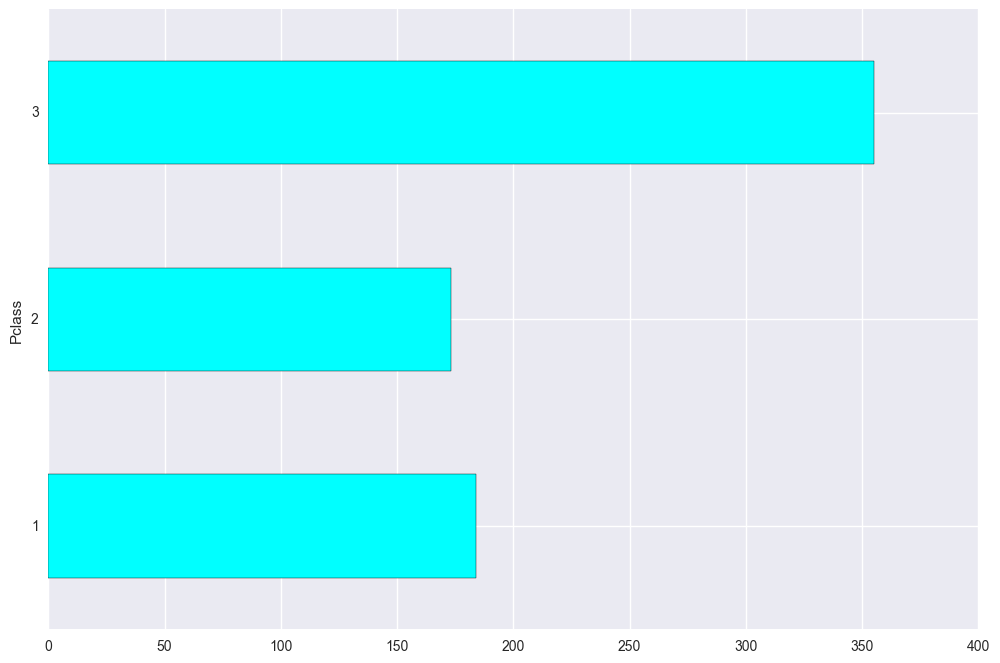

In [50]:
titanic.groupby(["Pclass"]).size().plot(kind="barh", figsize = (12,8), color = "aqua");

### Groupby and graphs with more than one variable

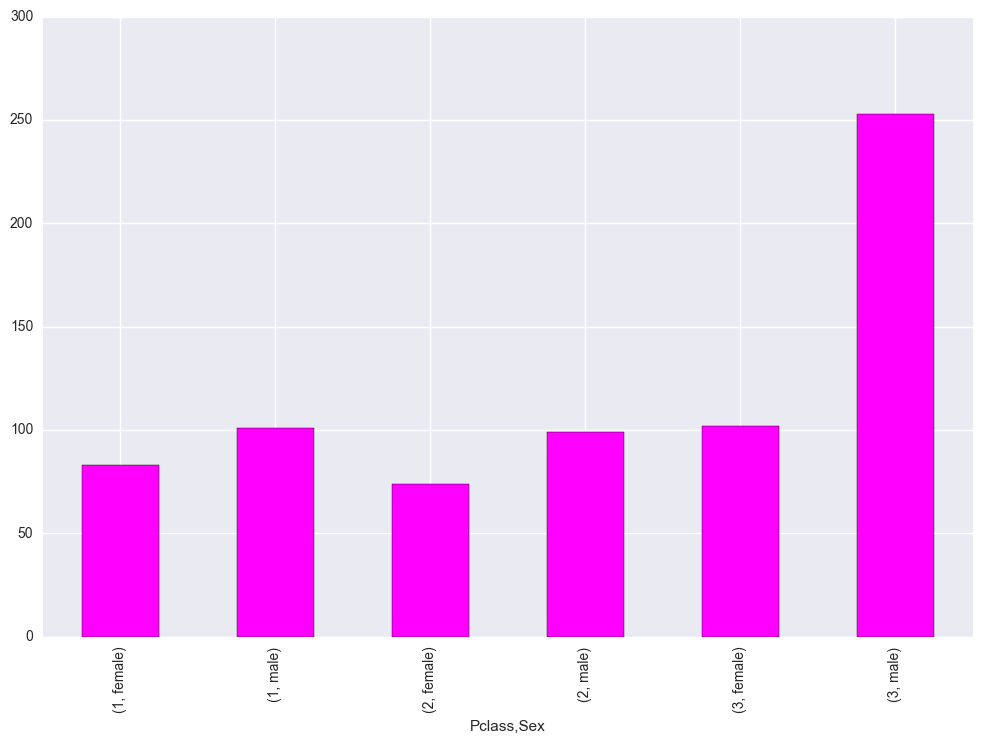

In [51]:
## Using a groupby statement on Pclass, make a kind='barh' graph 
titanic.groupby(["Pclass", "Sex"]).size().plot(kind="bar", figsize = (12,8), color = "magenta");

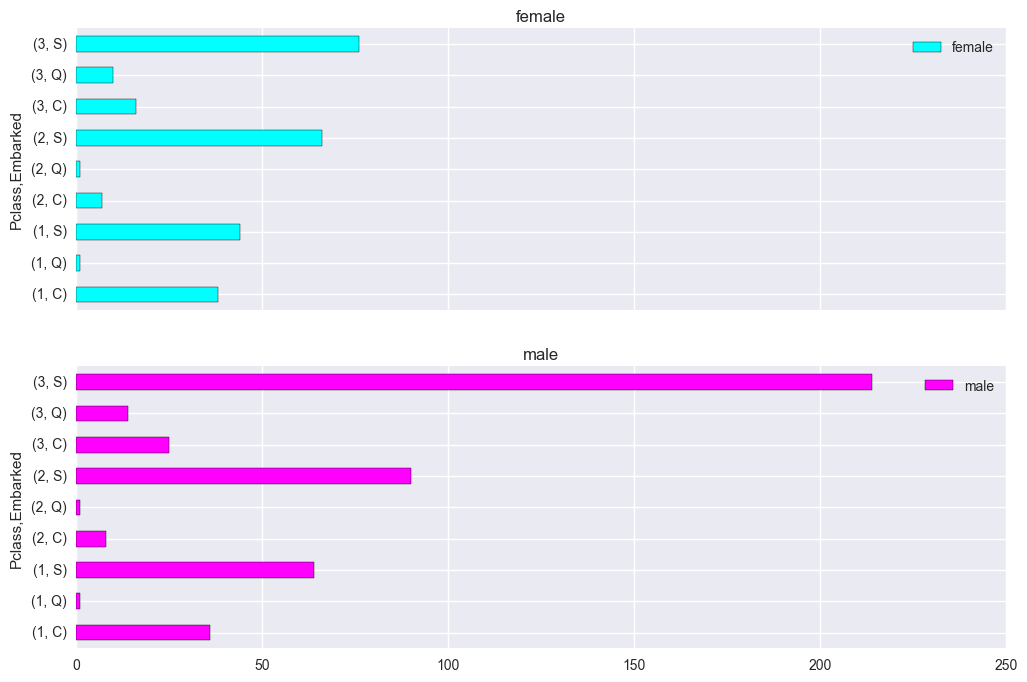

In [70]:
# create a kind='bar' that shows which group (men or women) survived the most
titanic.groupby(["Pclass", "Sex", "Embarked"]).size().unstack(level=1).plot(kind="barh", figsize = (12,8), subplots = True,color = ("aqua", "magenta"));

In [54]:
# Stacking isn't a bad choice for fewer categories but can look cluttery with lots of categories 
# titanic.groupby(['Pclass', 'Sex', 'Embarked']



In [65]:
# Let's create the previous plot without stacking
# titanic.groupby(['Pclass', 'Sex', 'Embarked']

Bar charts are great for displaying quanitites with groups and understanding quantity / size within subsets.  This is only an "introduction".  There are many ways to plot things.

***List of options for graph***

‘bar’ or ‘barh’ for bar plots

‘hist’ for histogram

‘box’ for boxplot

‘kde’ or 'density' for density plots

‘area’ for area plots

‘scatter’ for scatter plots

‘hexbin’ for hexagonal bin plots

‘pie’ for pie plots

### Density Plot

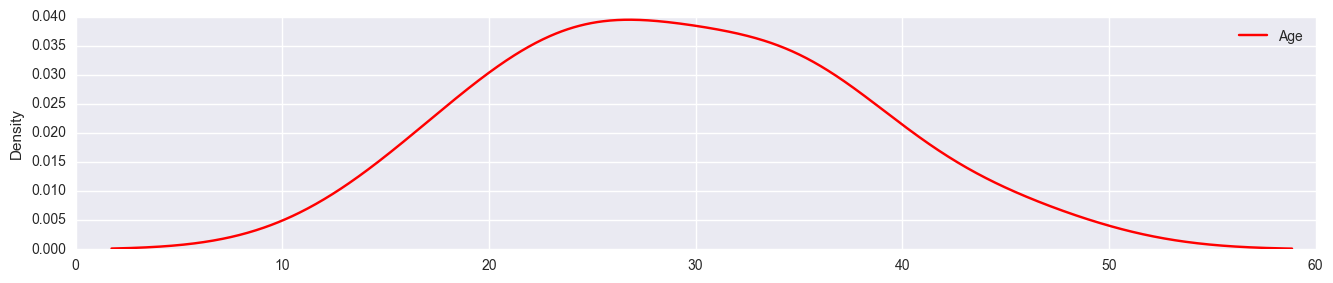

In [74]:
# plot a a density plot by using kind="kde"

titanic.groupby( ['Sex', 'Pclass','Survived'] )[ ['Age'] ].mean().plot(kind="kde", figsize =(16,3), color = "red");

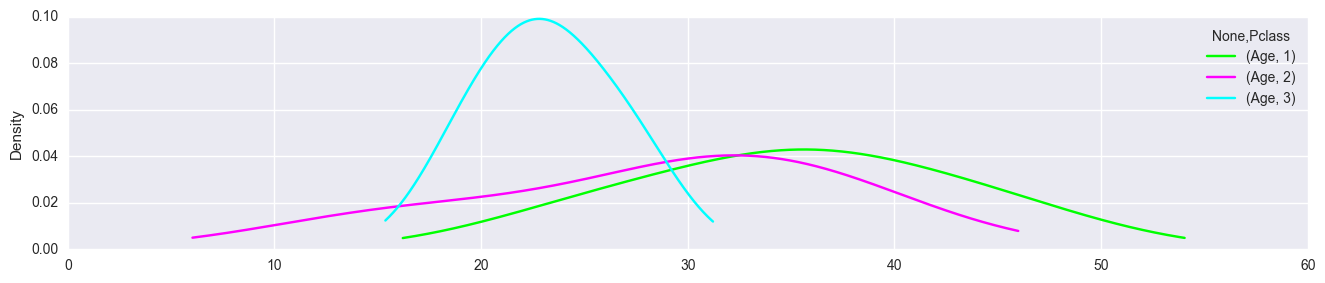

In [81]:
# plot a a density plot by using kind="kde"
# try unstacked plot

titanic.groupby( ['Sex', 'Pclass','Survived'] )[ ['Age'] ].mean().unstack(level=1).plot(kind="kde", figsize =(16,3), color = ("lime", "magenta", "aqua"));

### Using Seaborn for plotting

In [82]:
## A graph that doesn't use groupby, but uses a subset
subset_tita = titanic.groupby( ['Sex','Embarked', 'Age'] )[ ['Survived'] ].size().reset_index()
subset_tita.head()

,Sex,Embarked,Age,0
0,female,C,0.75,2
1,female,C,1.00,1
2,female,C,3.00,1
3,female,C,4.00,1
4,female,C,5.00,1


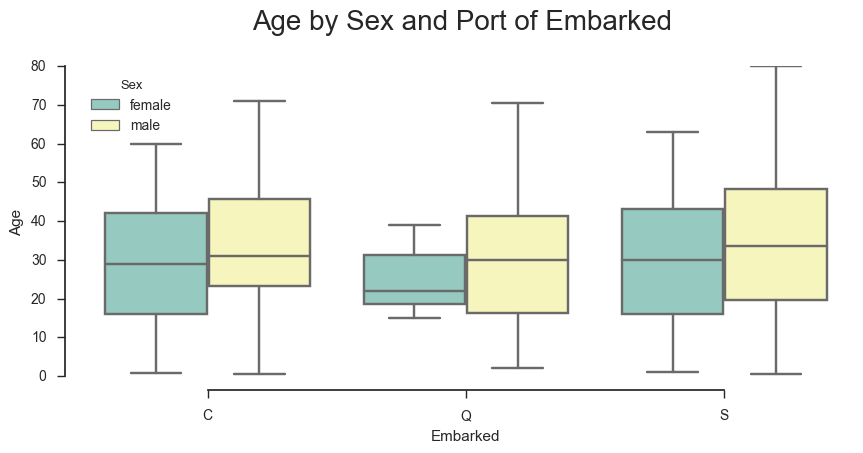

In [83]:
fig = plt.figure(figsize=(10,4))
sns.set(style="ticks")

sns.boxplot(x='Embarked', y="Age", hue="Sex", data=subset_tita, palette="Set3")
sns.despine(offset=10, trim=True)

plt.title('Age by Sex and Port of Embarked \n', fontsize = 20)
plt.show()